# Background
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

Complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


In [1]:
# Suppress Future Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Importing¶

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import platform
%config IPCompleter.greedy=True #autocomplete code
message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=0.21.3
Numpy version=1.16.5
Pandas version=0.25.1
Matplotlib version=3.1.1
Python version=3.7.4


In [3]:
from sklearn import datasets 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Import our libraries
import pandas as pd
import numpy as np
# Import sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve, auc, make_scorer, confusion_matrix, f1_score, fbeta_score
# Import the Naive Bayes, logistic regression, Bagging, RandomForest, AdaBoost, GradientBoost, Decision Trees and SVM Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')
from matplotlib.ticker import StrMethodFormatter
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer

In [5]:
titanic = pd.read_csv("TitanicDataset_train.csv")
titanic.head(10) #display the first 3 sets of data in train csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
titanictest = pd.read_csv("TitanicDataset_test.csv")
titanictest.head(5) #display the first 3 sets of data in train csv

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
kaggle_testset = pd.read_csv("100-Acc.csv")
kaggle_testset.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Exploratory Data Analysis

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# List out all variables with nulls/missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Get list of numeric and nonnumeric variables
numvars = list(titanic.columns[titanic.dtypes != "object"])
nonnumvars = list(titanic.columns[titanic.dtypes == "object"])
print(numvars)
print(nonnumvars)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [11]:
# Do some further exploration on list to get list of features used
numvars.remove('PassengerId')
numvars.remove('Survived')
numfeats = numvars
print(numfeats)

#nonnumvars.remove('Cabin')
nonnumvars.remove('Name')
nonnumvars.remove('Ticket')
nonnumfeats = nonnumvars
print(nonnumfeats)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Cabin', 'Embarked']


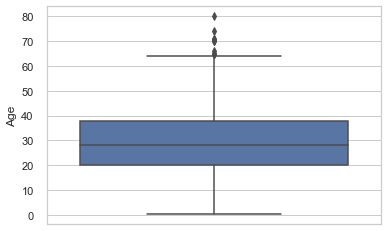

In [12]:
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(y=titanic["Age"])

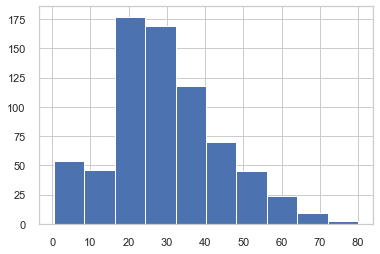

In [13]:
titanic['Age'].hist(bins=10)


# Data Preparation

## Handle missing values

In [14]:
# Age has some missing values which needs to be filled
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
model_mean_age = titanic['Age'].mean()
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# For the cabin parameter there are over 600 missing values
# We will replace the Cabin value with No if missing and Yes if there is a cabin number
titanic['Cabin'].fillna('No', inplace=True)
titanic['Cabin'].replace(regex=r'^((?!No).)*$',value='Yes',inplace=True)
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C


In [16]:
# 2 missing values in the embarked
# use the mode to replace it
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
model_embarked_mode = titanic['Embarked'].mode()[0]
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C


In [17]:
# Drop the PassengerId
titanic = titanic.drop(["PassengerId","Name","Ticket"],axis=1)
titanic.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,No,S
1,1,1,female,38.0,1,0,71.2833,Yes,C


In [18]:
# Encode all the categorical variables
titanicdf = pd.get_dummies(titanic,columns=nonnumfeats)
titanicdf.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,1,0,0


In [19]:
titanicdf.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Cabin_No        uint8
Cabin_Yes       uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [20]:
titanicdf.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.771044,0.228956,0.188552,0.086420,0.725028
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.420397,0.420397,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Since all values are numeric, do a correction and sort to determine the most important features relative to Survived
corr = titanicdf.corr()
corr.sort_values(["Survived"], ascending = False, inplace = True)
print(corr.Survived)

Survived      1.000000
Sex_female    0.543351
Cabin_Yes     0.316912
Fare          0.257307
Embarked_C    0.168240
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.069809
Embarked_S   -0.149683
Cabin_No     -0.316912
Pclass       -0.338481
Sex_male     -0.543351
Name: Survived, dtype: float64


# Train Model

## Split Data into Train and Test Sets

In [22]:
from sklearn.model_selection import train_test_split
y = titanicdf["Survived"].values
X = titanicdf.drop(["Survived"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Train Model with Algorithm: Logistics Regression 

In [23]:
# Train Model with Logistics Regression
from sklearn.linear_model import LogisticRegression
LogisticRegression_Model = LogisticRegression()
LogisticRegression_Model.fit(X_train,y_train)
Y_prediction = LogisticRegression_Model.predict(X_test)
LogisticRegression_Model.score(X_train, y_train)
acc_LR = round(LogisticRegression_Model.score(X_train, y_train) * 100, 2)

## Train Model with Algorithm: CART Classification Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
CART_Model = DecisionTreeClassifier()
CART_Model.fit(X_train,y_train)
Y_prediction = CART_Model.predict(X_test)
CART_Model.score(X_train, y_train)
acc_CART = round(CART_Model.score(X_train, y_train) * 100, 2)

## Train Model with Algorithm: SVM

In [25]:
from sklearn.svm import SVC
SVM_Model = SVC()
SVM_Model.fit(X_train, y_train)
Y_prediction = SVM_Model.predict(X_test)
SVM_Model.score(X_train, y_train)
acc_SVM = round(SVM_Model.score(X_train, y_train) * 100, 2)

## Train Model with Algorithm: K-Nearest Neighbour

In [26]:
from sklearn.neighbors import KNeighborsClassifier
K_NearestNeighbour = np.arange(1,20)
train_accuracy = np.empty(len(K_NearestNeighbour))
test_accuracy = np.empty(len(K_NearestNeighbour))
#Loop over the different values of K
for i,k in enumerate(K_NearestNeighbour):
    #Setup K-NN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    #train the model
    knn_classifier.fit(X_train, y_train)
    #Compute accuracy of training set
    train_accuracy[i] = knn_classifier.score(X_train, y_train)
    #Compute accuracy of test set
    test_accuracy[i] = knn_classifier.score(X_test, y_test)

**Checking accuracy of K**

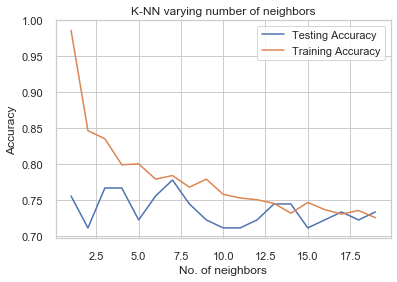

In [27]:
plt.title('K-NN varying number of neighbors')
plt.plot(K_NearestNeighbour, test_accuracy, label = 'Testing Accuracy')
plt.plot(K_NearestNeighbour, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy')
plt.show()

From the above graph, I will re-run the test, however I will limit it down to below 9

In [28]:
K_NearestNeighbour_run2 = np.arange(1,9)
train_accuracy = np.empty(len(K_NearestNeighbour_run2))
test_accuracy = np.empty(len(K_NearestNeighbour_run2))
#Loop over the different values of K
for i,k in enumerate(K_NearestNeighbour_run2):
    #Setup K-NN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    #train the model
    knn_classifier.fit(X_train, y_train)
    #Compute accuracy of training set
    train_accuracy[i] = knn_classifier.score(X_train, y_train)
    #Compute accuracy of test set
    test_accuracy[i] = knn_classifier.score(X_test, y_test)

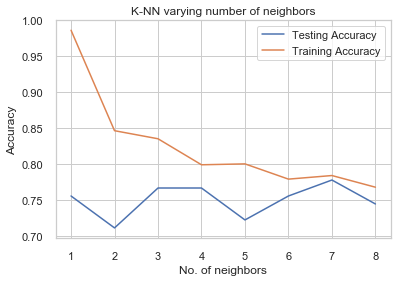

In [29]:
plt.title('K-NN varying number of neighbors')
plt.plot(K_NearestNeighbour_run2 , test_accuracy, label = 'Testing Accuracy')
plt.plot(K_NearestNeighbour_run2 , train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy')
plt.show()

It seems like we have a good accuracy with 2 so I will take that as my K value

In [30]:
K_NearestNeighbour_Model = KNeighborsClassifier(n_neighbors = 2)
K_NearestNeighbour_Model.fit(X_train, y_train)
Y_prediction = K_NearestNeighbour_Model.predict(X_test)
K_NearestNeighbour_Model.score(X_train, y_train)
acc_KNN = round(K_NearestNeighbour_Model.score(X_train, y_train) * 100, 2)

## Train Model with Algorithm: Naive Bayes

In [31]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
NaiveBayes_Model = GaussianNB()
NaiveBayes_Model.fit(X_train, y_train)
Y_prediction = NaiveBayes_Model.predict(X_test)
NaiveBayes_Model.score(X_train, y_train)
acc_NB = round(NaiveBayes_Model.score(X_train, y_train) * 100, 2)

## Train Model with Algorithm: Stochastic Gradient Descent

In [32]:
from sklearn.linear_model import SGDClassifier
SGD_Model = SGDClassifier()
SGD_Model.fit(X_train, y_train)
Y_prediction = SGD_Model.predict(X_test)
SGD_Model.score(X_train, y_train)
acc_SGD = round(SGD_Model.score(X_train, y_train) * 100, 2)

## Train Model with Algorithm: Gradient Boosting Classifier

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.45, 0.5, 0.6, 0.75, 0.8, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=63, learning_rate = learning_rate, max_features=2, max_depth = 5, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.1
Accuracy score (training): 0.905
Accuracy score (validation): 0.811

Learning rate:  0.2
Accuracy score (training): 0.933
Accuracy score (validation): 0.811

Learning rate:  0.3
Accuracy score (training): 0.950
Accuracy score (validation): 0.811

Learning rate:  0.4
Accuracy score (training): 0.964
Accuracy score (validation): 0.811

Learning rate:  0.45
Accuracy score (training): 0.970
Accuracy score (validation): 0.756

Learning rate:  0.5
Accuracy score (training): 0.969
Accuracy score (validation): 0.778

Learning rate:  0.6
Accuracy score (training): 0.975
Accuracy score (validation): 0.756

Learning rate:  0.75
Accuracy score (training): 0.981
Accuracy score (validation): 0.789

Learning rate:  0.8
Accuracy score (training): 0.978
Accuracy score (validation): 0.811

Learning rate:  1
Accuracy score (training): 0.954
Accuracy score (validation): 0.822



As you can see, the learning rate at 0.5 gave the best score so I will use that to train

In [34]:
GB_Model = GradientBoostingClassifier(n_estimators=63, learning_rate = 0.5, max_features=2, max_depth = 5, random_state = 0)
GB_Model.fit(X_train, y_train)
Y_prediction = GB_Model.predict(X_test)
GB_Model.score(X_train, y_train)
acc_GBC = round(GB_Model.score(X_train, y_train) * 100, 2)

## Train Model with Algorithm: Random Forest

In [35]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

## Train model with Algorithm: Perceptron

In [36]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)

## Train model with Algorithm: Linear Support Vector Machine

In [37]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

# Score and Evaluate Model

## Score Model and Evaluate Model with:  Logistics Regression

In [38]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'CART','SVM', 'KNN', 'Naive Bayes','SGD','GBC', 'Random Forest','Perceptron','LSVM'],
    'Score': [acc_LR,acc_CART,acc_SVM,acc_KNN,acc_NB,acc_SGD, acc_GBC, acc_random_forest, acc_perceptron, acc_linear_svc]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(10)


,Model
Score,
98.63,CART
98.63,Random Forest
96.88,GBC
88.51,SVM
84.64,KNN
79.15,Linear Regression
77.28,Naive Bayes
76.78,LSVM
75.66,SGD


In [39]:
# score model for test set
y_hat_LogisticRegression_Model = LogisticRegression_Model.predict(X_test)

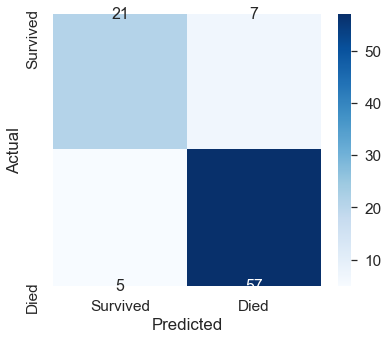

In [40]:
from sklearn.metrics import confusion_matrix
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat_LogisticRegression_Model, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [41]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat_LogisticRegression_Model)
print("Accuracy score for the test set with Logistics Regression={:.2f}%".format(score*100))

Accuracy score for the test set with Logistics Regression=86.67%


## Score Model and Evaluate Model with:  CART

In [42]:
# score model for test set
y_hat_CART_Model = CART_Model.predict(X_test)

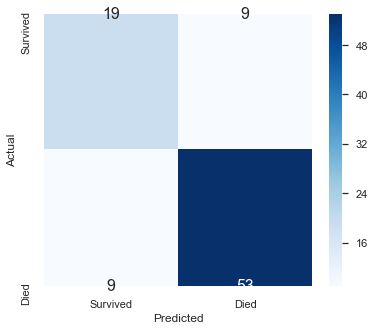

In [43]:
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat_CART_Model, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [44]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat_CART_Model)
print("Accuracy score for the test set with CART={:.2f}%".format(score*100))

Accuracy score for the test set with CART=80.00%


## Score Model and Evaluate Model with:  SVM

In [45]:
# score model for test set
y_hat_SVM_Model = SVM_Model.predict(X_test)

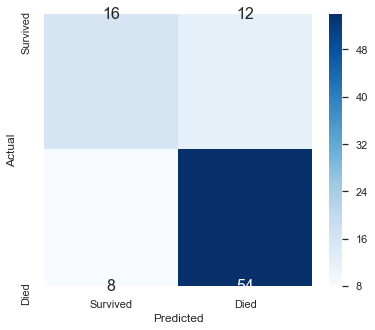

In [46]:
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat_SVM_Model, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [47]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat_SVM_Model)
print("Accuracy score for the test set with SVM={:.2f}%".format(score*100))

Accuracy score for the test set with SVM=77.78%


## Score Model and Evaluate Model with: K-Nearest Neighbour

In [48]:
y_hat_KNN_Model = K_NearestNeighbour_Model.predict(X_test)

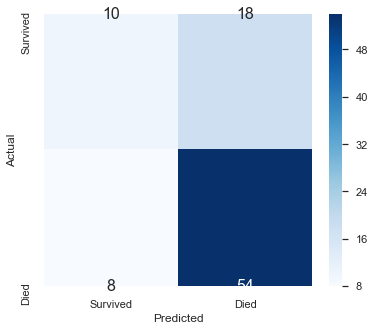

In [49]:
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat_KNN_Model, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [50]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat_KNN_Model)
print("Accuracy score for the test set with KNN={:.2f}%".format(score*100))

Accuracy score for the test set with KNN=71.11%


## Score Model and Evaluate Model with: Naive Bayes

In [51]:
y_hat_NB_Model = NaiveBayes_Model.predict(X_test)

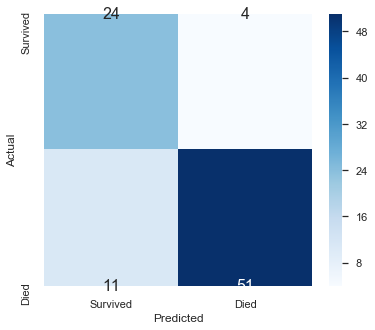

In [52]:
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat_NB_Model, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [53]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat_NB_Model)
print("Accuracy score for the test set with NB={:.2f}%".format(score*100))

Accuracy score for the test set with NB=83.33%


## Score Model and Evaluate Model with: Stochastic Gradient Descent

In [54]:
y_hat_SGD_Model = SGD_Model.predict(X_test)

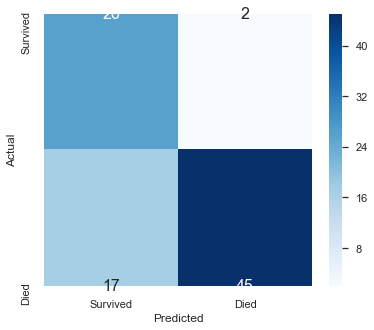

In [55]:
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat_SGD_Model, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [56]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat_SGD_Model)
print("Accuracy score for the test set with SGD={:.2f}%".format(score*100))

Accuracy score for the test set with SGD=78.89%


## Score Model and Evaluate Model with: Gradient Boosting Classifier

In [57]:
y_hat_GB_Model = GB_Model.predict(X_test)

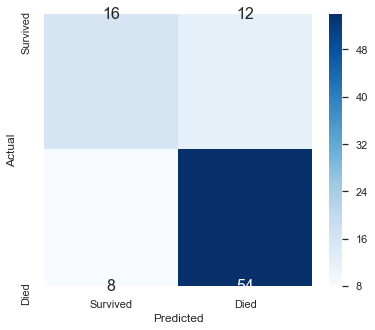

In [58]:
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat_GB_Model, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [59]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat_GB_Model)
print("Accuracy score for the test set with GB={:.2f}%".format(score*100))

Accuracy score for the test set with GB=77.78%


## Score Model and Evaluate Model with: Random Forest

In [60]:
y_hat_RF_Model = random_forest.predict(X_test)

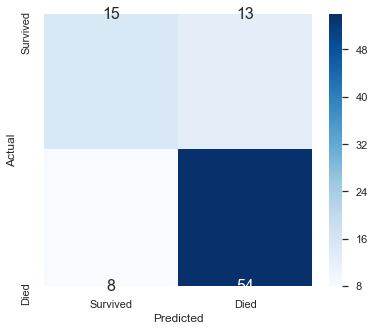

In [61]:
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat_RF_Model, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [62]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat_RF_Model)
print("Accuracy score for the test set with RF={:.2f}%".format(score*100))

Accuracy score for the test set with RF=76.67%


## Score Model and Evaluate Model with: Perceptron

In [63]:
y_hat_Per_Model = perceptron.predict(X_test)

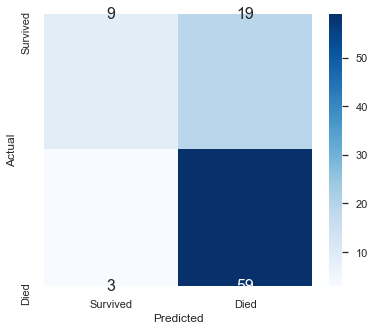

In [64]:
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat_Per_Model, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [65]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat_Per_Model)
print("Accuracy score for the test set with Per={:.2f}%".format(score*100))

Accuracy score for the test set with Per=75.56%


## Score Model and Evaluate Model with:LinearSVM

In [66]:
y_hat_LSVM_Model = linear_svc.predict(X_test)

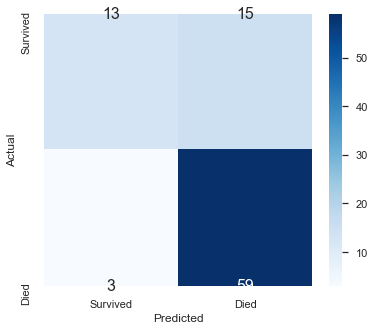

In [67]:
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat_LSVM_Model, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [68]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat_LSVM_Model)
print("Accuracy score for the test set with LSVM={:.2f}%".format(score*100))

Accuracy score for the test set with LSVM=80.00%


# Submitting to Kaggle

## Stupid Baseline (Everyone Dies)

The stupid baseline is based on the majority of *Survived* status. In which case, we will have a rule which states that everybody died in the Titanic. 

In [69]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = 0
dfout[:5]


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [70]:
dfout.to_csv("stupidbaseline.csv",index=False)

## Data Preparation for the test.csv

In [71]:
titanictest.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [72]:
kaggle_testset.dtypes

PassengerId    int64
Survived       int64
dtype: object

In [73]:
titanictestdf = titanictest.drop(["PassengerId","Name","Ticket"],axis=1)
titanictestdf.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S


In [74]:
kaggle_testset.head(2)

,PassengerId,Survived
0,892,0
1,893,1


In [75]:
# List out all variables with nulls/missing values
titanictestdf.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [76]:
# fill in the missing age
titanictestdf['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [77]:
# fill in the missing cabins
# We will replace the Cabin value with No if missing and Yes if there is a cabin number
titanictestdf['Cabin'].fillna('No', inplace=True)
titanictestdf['Cabin'].replace(regex=r'^((?!No).)*$',value='Yes',inplace=True)
titanictestdf.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,No,Q
1,3,female,47.0,1,0,7.0000,No,S


In [78]:
# fill in the missing fare with the mean fare
titanictestdf['Fare'].fillna(titanic['Fare'].mean(), inplace=True)

In [79]:
# List out all variables with nulls/missing values
titanictestdf.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [80]:
# Encode all the categorical variables
predictdf = pd.get_dummies(titanictestdf,columns=nonnumfeats)
predictdf.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,1,0,0,1,0
1,3,47.0,1,0,7.0000,1,0,1,0,0,0,1


In [81]:
Xp = predictdf.values
Xp[:2]

array([[ 3.    , 34.5   ,  0.    ,  0.    ,  7.8292,  0.    ,  1.    ,
         1.    ,  0.    ,  0.    ,  1.    ,  0.    ],
       [ 3.    , 47.    ,  1.    ,  0.    ,  7.    ,  1.    ,  0.    ,
         1.    ,  0.    ,  0.    ,  0.    ,  1.    ]])

## Prediction with Logistics Regression Trained Model

In [82]:
yp_hat_LGR = LogisticRegression_Model.predict(Xp)

In [83]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat_LGR
dfout[:418]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [84]:
dfout.to_csv("Prediction_LogisticRegression.csv",index=False)

## Prediction with CART Trained Model

In [85]:
yp_hat_CART = CART_Model.predict(Xp)

In [86]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat_CART
dfout[:418]

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [87]:
dfout.to_csv("Prediction_CART.csv",index=False)

## Prediction with SVM Trained Model

In [88]:
yp_hat_SVM = SVM_Model.predict(Xp)

In [89]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat_SVM
dfout[:418]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [90]:
dfout.to_csv("Prediction_SVM.csv",index=False)

## Prediction with K-Nearest Neighbour Regression Trained Model

In [91]:
yp_hat_KNN = K_NearestNeighbour_Model.predict(Xp)

In [92]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat_KNN
dfout[:418]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [93]:
dfout.to_csv("Prediction_KNN.csv",index=False)

## Prediction with Naive Bayes Trained Model

In [94]:
yp_hat_NB = NaiveBayes_Model.predict(Xp)

In [95]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat_NB
dfout[:418]

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [96]:
dfout.to_csv("Prediction_NB.csv",index=False)

## Prediction with Stochastic Gradient Descent Trained Model

In [97]:
yp_hat_SGD = SGD_Model.predict(Xp)

In [98]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat_SGD
dfout[:418]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [99]:
dfout.to_csv("Prediction_SGD.csv",index=False)

## Predicting with Gradient Boosting Classifier

In [100]:
yp_hat_GBC = GB_Model.predict(Xp)

In [101]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat_GBC
dfout[:418]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [102]:
dfout.to_csv("Prediction_GBC.csv",index=False)

## Predicting with Random Forest

In [103]:
yp_hat_RF = random_forest.predict(Xp)

In [104]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat_RF
dfout[:418]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [105]:
dfout.to_csv("Prediction_RF.csv",index=False)

## Predicting with Perceptron

In [106]:
yp_hat_Per = perceptron.predict(Xp)

In [107]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat_Per
dfout[:418]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [108]:
dfout.to_csv("Prediction_Perceptron.csv",index=False)

## Predicting with Linear SVM

In [109]:
yp_hat_LSVM = linear_svc.predict(Xp)

In [110]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat_LSVM
dfout[:418]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [111]:
dfout.to_csv("Prediction_LSVM.csv",index=False)

# Conclusions

This project is to predict the who would survive in the titanic, as the ouput is either survived or died, it is a classification task. A regression task would be if the output is scalable, like prices or percentage, where data is on a scale rather than like a yes or no. So unless this task is changed in such a way to predict the chances of survivalbility then, it would be a regression task. Otherwise, it is a classification task.

After running different models, the better performing ones are Linear Regression and Gradient Boosting Classifier
On Kaggle, my highest score was a 0.77 which means my prediction are 77% correct.

For the data, I removed the names, id and ticket when training as they should not be the factors of survivability. I did not do any special modifications to the features as I did not see a point in doing so.

For learning algorithms, I felt that the best way to go about it was to use as many as possible and then sifting out the better ones to use. So for example, in my tests, Gradient Boosting Classifier and Logistic Regression were among the top when it come's to accuracy of prediction and hence, these were my choices if I needed to make a prediction. However, I trained so many models is to ensure that I can see which are more accurate.

As for hyperparameters, I did not go into very specific tuning, so for example, I only tuned the K value of the K-NN model, as well as changing the learning rate for the Gradient Boosting Classifier.

I check my results against kaggle for accuracy as the accuracy check I've implemented in Jupyter notebook is not as accurate as the one on Kaggle. When compared to a baseline assumption that everyone died, it was about 15% more accurate. The baseline got a score of 0.62 whereas mine was 0.77.
